# Lightweight AutoML Demo — Iris Dataset

This notebook demonstrates how to:

1. Run the **Lightweight AutoML** system on the Iris dataset.
2. Inspect the resulting leaderboard of models.
3. Load the saved **best model checkpoint** for Iris.
4. Evaluate the model and visualize performance.


## 1. Setup

Make sure you've installed the project requirements (from the repo root):

```bash
pip install -r requirements.txt
```

Then run this notebook **from the project root directory**, so paths like `data/iris.csv` and `automl_orchestrator.py` resolve correctly.

In [6]:
from pathlib import Path
import os, sys

# Get current directory of the notebook (notebooks/)
NOTEBOOK_DIR = Path().resolve()

# Project root is one level up
PROJECT_ROOT = NOTEBOOK_DIR.parent
os.chdir(PROJECT_ROOT)

print("Working directory set to:", Path.cwd())

# Add to Python path
sys.path.insert(0, str(PROJECT_ROOT))

# Now imports work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

from automl_orchestrator import run_automl




Working directory set to: /Users/mattn/Documents/VT_Undergrad/Fall_25:26/CS_4824/final_project/autoML-CS4824


## 2. Run AutoML on Iris

This will:
- Load `data/iris.csv`
- Automatically infer schema and build preprocessing
- Run hyperparameter search over the model zoo
- Build ensembles
- Save a leaderboard CSV in `results/`
- Save the **best overall model** checkpoint to `checkpoints/best_model_iris.pkl`

In [7]:
iris_path = "data/iris.csv"
target_col = "class"

leaderboard_df = run_automl(data_path=iris_path, target_column=target_col)

leaderboard_df

[I 2025-12-10 23:42:15,311] A new study created in memory with name: no-name-9777137e-631d-4a94-8c92-f7c5a552e595


[I 2025-12-10 23:42:15,346] Trial 0 finished with value: 0.9110953058321479 and parameters: {'model__C': 0.14045462299176917, 'model__solver': 'lbfgs'}. Best is trial 0 with value: 0.9110953058321479.
[I 2025-12-10 23:42:15,362] Trial 1 finished with value: 0.9461830251303937 and parameters: {'model__C': 4.678527401696364, 'model__solver': 'lbfgs'}. Best is trial 1 with value: 0.9461830251303937.
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is dep


 Starting AutoML Pipeline


 Detected Task Type: CLASSIFICATION

 Scoring metric: ACCURACY

[Meta-Learning] Warm-start hyperparameters:
{
  "logistic_regression": {
    "model__C": 2.6555994674616787,
    "model__solver": "lbfgs"
  },
  "ridge": null,
  "decision_tree": {
    "model__max_depth": 14.0,
    "model__min_samples_split": 3.6666666666666665
  },
  "random_forest": {
    "model__n_estimators": 132.33333333333334,
    "model__max_depth": 18.666666666666668
  },
  "gradient_boosting": {
    "model__n_estimators": 180.33333333333334,
    "model__learning_rate": 0.12567122746526152,
    "model__max_depth": 5.333333333333333
  },
  "neural_net": {
    "model__learning_rate_init": 0.023278286443259865
  },
  "tiny_nas": {
    "activation": "tanh",
    "learning_rate_init": 0.001
  }
}

=== Running LOGISTIC_REGRESSION ===


[I 2025-12-10 23:42:15,505] Trial 11 finished with value: 0.9551920341394026 and parameters: {'model__C': 1.066075866982243, 'model__solver': 'lbfgs'}. Best is trial 4 with value: 0.9551920341394026.
[I 2025-12-10 23:42:15,510] A new study created in memory with name: no-name-16caf48f-2a7f-43b8-835a-10371db3f579
[I 2025-12-10 23:42:15,524] Trial 0 finished with value: 0.9286391654812708 and parameters: {'model__max_depth': 20, 'model__min_samples_split': 4}. Best is trial 0 with value: 0.9286391654812708.
[I 2025-12-10 23:42:15,536] Trial 1 finished with value: 0.9286391654812708 and parameters: {'model__max_depth': 5, 'model__min_samples_split': 5}. Best is trial 0 with value: 0.9286391654812708.
[I 2025-12-10 23:42:15,548] Trial 2 finished with value: 0.9286391654812708 and parameters: {'model__max_depth': 10, 'model__min_samples_split': 8}. Best is trial 0 with value: 0.9286391654812708.
[I 2025-12-10 23:42:15,559] Trial 3 finished with value: 0.9286391654812708 and parameters: {'mo


 Skipping RIDGE (regression model not compatible with classification task)

=== Running DECISION_TREE ===

=== Running RANDOM_FOREST ===


[I 2025-12-10 23:42:15,816] Trial 0 finished with value: 0.9551920341394026 and parameters: {'model__n_estimators': 52, 'model__max_depth': 9}. Best is trial 0 with value: 0.9551920341394026.
[I 2025-12-10 23:42:16,111] Trial 1 finished with value: 0.9551920341394026 and parameters: {'model__n_estimators': 154, 'model__max_depth': 19}. Best is trial 0 with value: 0.9551920341394026.
[I 2025-12-10 23:42:16,532] Trial 2 finished with value: 0.9551920341394026 and parameters: {'model__n_estimators': 248, 'model__max_depth': 14}. Best is trial 0 with value: 0.9551920341394026.
[I 2025-12-10 23:42:16,966] Trial 3 finished with value: 0.9551920341394026 and parameters: {'model__n_estimators': 271, 'model__max_depth': 12}. Best is trial 0 with value: 0.9551920341394026.
[I 2025-12-10 23:42:17,372] Trial 4 finished with value: 0.9551920341394026 and parameters: {'model__n_estimators': 247, 'model__max_depth': 16}. Best is trial 0 with value: 0.9551920341394026.
[I 2025-12-10 23:42:17,781] Tria


=== Running GRADIENT_BOOSTING ===


[I 2025-12-10 23:42:19,711] Trial 1 finished with value: 0.9286391654812708 and parameters: {'model__n_estimators': 53, 'model__learning_rate': 0.025288563657246608, 'model__max_depth': 6}. Best is trial 0 with value: 0.9374110953058321.
[I 2025-12-10 23:42:20,189] Trial 2 finished with value: 0.9286391654812708 and parameters: {'model__n_estimators': 291, 'model__learning_rate': 0.013703184778433575, 'model__max_depth': 8}. Best is trial 0 with value: 0.9374110953058321.
[I 2025-12-10 23:42:20,494] Trial 3 finished with value: 0.9286391654812708 and parameters: {'model__n_estimators': 175, 'model__learning_rate': 0.0627372308603218, 'model__max_depth': 6}. Best is trial 0 with value: 0.9374110953058321.
[I 2025-12-10 23:42:20,679] Trial 4 finished with value: 0.9286391654812708 and parameters: {'model__n_estimators': 98, 'model__learning_rate': 0.017485097697945776, 'model__max_depth': 7}. Best is trial 0 with value: 0.9374110953058321.
[I 2025-12-10 23:42:20,983] Trial 5 finished wit


=== Running NEURAL_NET ===


/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/optuna/distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (32,) which is of type tuple.
  warnings.warn(message)
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/optuna/distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (64,) which is of type tuple.
  warnings.warn(message)
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/optuna/distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (128,) which is of type tuple.
  warnings.warn(message)
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/optuna/distributions.py:518


=== Running TINY_NAS ===
Running TinyNAS architecture search …


/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and 

[BEST CHECKPOINT] Saved best model for iris: checkpoints/best_model_iris.pkl

 AutoML Leaderboard saved to: results/leaderboard_iris_20251210_234225.csv
Total runtime: 10.66s
dataset      task_type                model  best_cv_score  test_score  runtime_sec                                                                                       best_params                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/

,dataset,task_type,model,best_cv_score,test_score,runtime_sec,best_params,best_estimator
6,iris,classification,soft_voting_ensemble,NaN,0.9737,NaN,"{'models_used': ['gradient_boosting', 'tiny_na...",NaN
3,iris,classification,gradient_boosting,0.9642,0.9474,3.51,"{'model__n_estimators': 236, 'model__learning_...","(ColumnTransformer(transformers=[('num',\n ..."
7,iris,classification,stacking_ensemble,NaN,0.9474,NaN,"{'models_used': ['gradient_boosting', 'tiny_na...",NaN
0,iris,classification,logistic_regression,0.9552,0.9211,0.20,"{'model__C': 1.1543522456272166, 'model__solve...","(ColumnTransformer(transformers=[('num',\n ..."
1,iris,classification,decision_tree,0.9374,0.9211,0.15,"{'model__max_depth': 2, 'model__min_samples_sp...","(ColumnTransformer(transformers=[('num',\n ..."
2,iris,classification,random_forest,0.9552,0.9211,3.78,"{'model__n_estimators': 52, 'model__max_depth'...","(ColumnTransformer(transformers=[('num',\n ..."
4,iris,classification,neural_net,0.9552,0.9211,1.69,"{'model__hidden_layer_sizes': (128,), 'model__...","(ColumnTransformer(transformers=[('num',\n ..."
5,iris,classification,tiny_nas,0.9642,0.8421,NaN,"{'hidden_layer_sizes': (32,), 'activation': 't...","MLPClassifier(activation='tanh', hidden_layer_..."


## 3. Load the Best Iris Model Checkpoint

The orchestrator saves the best model (by held-out test score) for each dataset as:

```text
checkpoints/best_model_<dataset_name>.pkl
```

For Iris, this should be `checkpoints/best_model_iris.pkl`.

In [8]:
from pathlib import Path
import joblib

checkpoint_path = Path("checkpoints") / "best_model_iris.pkl"
print("Checkpoint path:", checkpoint_path)

best_model_iris = joblib.load(checkpoint_path)
best_model_iris


Checkpoint path: checkpoints/best_model_iris.pkl


,hidden_layer_sizes,"(32,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,None


## 4. Evaluate the Best Model on the Full Iris Dataset

Here we:
- Reload `iris.csv`
- Separate features and target
- Use the saved best model to predict
- Print a classification report and confusion matrix


In [9]:
iris_df = pd.read_csv(iris_path)
X_iris = iris_df.drop(columns=[target_col])
y_iris = iris_df[target_col]

y_pred = best_model_iris.predict(X_iris)

print("Classification report (best Iris model):\n")
print(classification_report(y_iris, y_pred))

cm = confusion_matrix(y_iris, y_pred)
cm

Classification report (best Iris model):

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.33      1.00      0.50        50

       accuracy                           0.33       150
      macro avg       0.11      0.33      0.17       150
   weighted avg       0.11      0.33      0.17       150



/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/mattn/Downloads/miniconda3/envs/CS4824/lib/python3.12/site-packages/sk

array([[ 0,  0, 50],
       [ 0,  0, 50],
       [ 0,  0, 50]])

### Confusion Matrix Heatmap

Let's visualize the confusion matrix for a clearer view of which classes are confused.

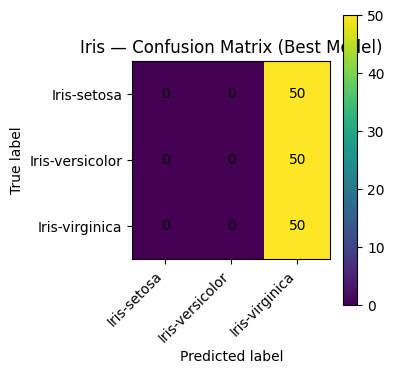

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm, interpolation="nearest")
ax.set_title("Iris — Confusion Matrix (Best Model)")
plt.colorbar(im, ax=ax)

classes = sorted(y_iris.unique())
ax.set_xticks(range(len(classes)))
ax.set_yticks(range(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha="right")
ax.set_yticklabels(classes)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

## 5. Visualize Leaderboard Scores

Finally, let's make a simple bar chart of the test scores for each model on Iris. This corresponds directly to the model zoo performance described in the report.

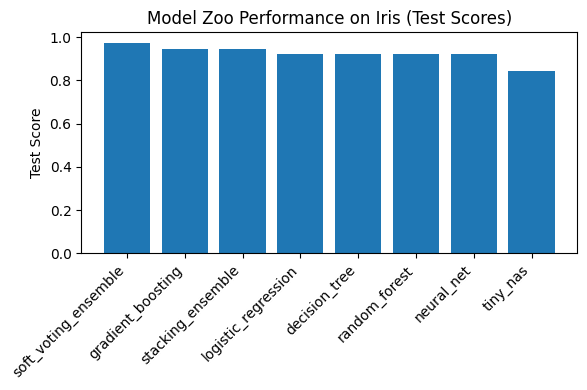

In [11]:
plt.figure(figsize=(6, 4))
plt.bar(leaderboard_df["model"], leaderboard_df["test_score"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test Score")
plt.title("Model Zoo Performance on Iris (Test Scores)")
plt.tight_layout()
plt.show()

## 6. Summary

In this notebook, we:
- Ran the **Lightweight AutoML** system on the Iris dataset.
- Inspected the model leaderboard.
- Loaded the **best model checkpoint** and evaluated it on the full dataset.
- Visualized the confusion matrix and model zoo performance.

This example demonstrates the full pipeline from **AutoML orchestration** to **saved checkpoints** and **downstream analysis**, matching the behavior described in the final report.